## Imports

In [305]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import import_ipynb
import functions as f

## Extract

In [306]:
df_cases = pd.read_parquet('./Processed/WHO-COVID19-CASES.parquet')

df_vaccines = pd.read_parquet('./Processed/WHO-COVID19-VACCINES.parquet')

df_countries = pd.read_parquet('./Processed/COUNTRIES_DETAILED.parquet')

In [307]:
# join cases, vaccines, countries dataframes and preserve index

df_merged = pd.merge(pd.merge(df_cases, df_vaccines[['DailyVaccinations', 'PeopleFullyVaccinated', 'PeopleVaccinated']], left_index=True, right_index=True, how='left'), df_countries, on='IsoCode', how='left').set_axis(df_cases.index).drop(columns=['HumanDevelopmentIndex', 'LifeExpectancy', 'Aged65Older', 'Aged70Older', 'Alpha2'])

## Data exploration and Visualization

In [308]:
# set the ploting style

plt.style.use('ggplot') # go back and execute the graph again

In [309]:
df_merged['CumulativeDeathsPopulationRatio'] = df_merged['CumulativeDeaths'] / df_merged['Population']

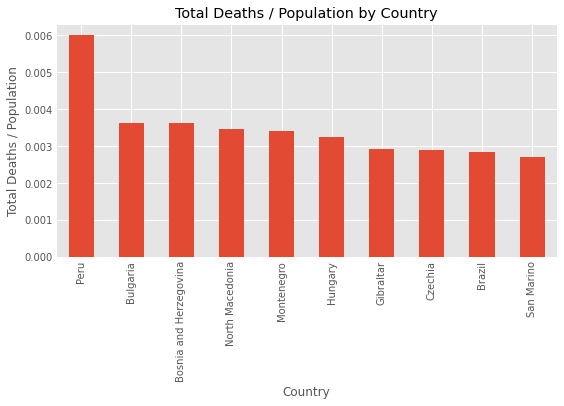

In [310]:
# Visualize total deaths as a percentage of the total population

df_merged.groupby('Country')['CumulativeDeathsPopulationRatio'].max().sort_values(ascending=False).head(10).plot(kind='bar', ylabel='Total Deaths / Population', title='Total Deaths / Population by Country', figsize=(8,4), fontsize=10);

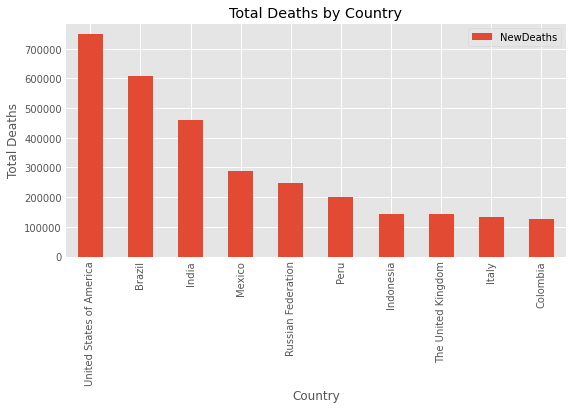

In [311]:
# Visualise total deaths per country

df_merged.groupby('Country').agg({'NewDeaths':'sum'}).sort_values('NewDeaths', ascending=False).head(10).plot(kind='bar', ylabel='Total Deaths', title='Total Deaths by Country', figsize=(8,4), fontsize=10);

In [312]:
df_merged.groupby(['Country', 'WhoRegion'])['PeopleFullyVaccinated'].max().sort_values(ascending=False).head(20)

Country                     WhoRegion
China                       WPRO         1.072454e+09
India                       SEARO        3.454859e+08
United States of America    AMRO         1.929244e+08
Brazil                      AMRO         1.231666e+08
Japan                       WPRO         9.376279e+07
Indonesia                   SEARO        7.921248e+07
Mexico                      AMRO         6.226448e+07
Germany                     EURO         5.585793e+07
Russian Federation          EURO         4.963943e+07
Turkey                      EURO         4.927011e+07
France                      EURO         4.620616e+07
The United Kingdom          EURO         4.587304e+07
Pakistan                    EMRO         4.508486e+07
Italy                       EURO         4.354590e+07
Republic of Korea           WPRO         3.950282e+07
Iran (Islamic Republic of)  EMRO         3.778454e+07
Spain                       EURO         3.739825e+07
Philippines                 WPRO         3.5

In [313]:
df_merged[(df_merged['Country'] == 'Bulgaria') & (df_merged['DateReported'] == '2021-10-01')]

,DateReported,Country,IsoCode,WhoRegion,NewCases,CumulativeCases,NewDeaths,CumulativeDeaths,DailyVaccinations,PeopleFullyVaccinated,PeopleVaccinated,Continent,Location,Population,PopulationDensity,MedianAge,GdpPerCapita,CumulativeDeathsPopulationRatio
Key,,,,,,,,,,,,,,,,,,
BGR20211001,2021-10-01,Bulgaria,BGR,EURO,2050,502162,70,20882,6019.0,1335039.0,NaN,Europe,Bulgaria,6896655.0,65.18,44.7,18563.307,0.003028


In [314]:
df_merged['FullyVaccinatedPopulationRatio'] = df_merged['PeopleFullyVaccinated'] / df_merged['Population']

<AxesSubplot:xlabel='Country'>

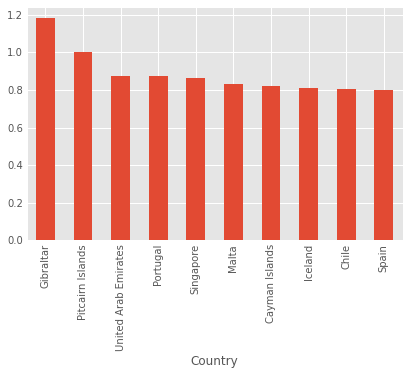

In [315]:
df_merged.groupby('Country')['FullyVaccinatedPopulationRatio'].max().sort_values(ascending=False).head(10).plot(kind='bar')